## Data Acquisition 

##### Import relevant packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

In [2]:
##plt.style('fivethirtyeight')

In [3]:
dataset = pd.read_csv('nations.csv')
dataset.head()

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,1996,NaN,NaN,64291.0,10.9,2.8,Europe & Central Asia,High income
1,AD,AND,Andorra,1994,NaN,NaN,62707.0,10.9,3.2,Europe & Central Asia,High income
2,AD,AND,Andorra,2003,NaN,NaN,74783.0,10.3,2.0,Europe & Central Asia,High income
3,AD,AND,Andorra,1990,NaN,NaN,54511.0,11.9,4.3,Europe & Central Asia,High income
4,AD,AND,Andorra,2009,NaN,NaN,85474.0,9.9,1.7,Europe & Central Asia,High income


In [4]:
dataset.shape

(5275, 11)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5275 entries, 0 to 5274
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   iso2c               5250 non-null   object 
 1   iso3c               5275 non-null   object 
 2   country             5275 non-null   object 
 3   year                5275 non-null   int64  
 4   gdp_percap          4509 non-null   float64
 5   life_expect         4882 non-null   float64
 6   population          5261 non-null   float64
 7   birth_rate          4980 non-null   float64
 8   neonat_mortal_rate  4750 non-null   float64
 9   region              5275 non-null   object 
 10  income              5275 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 453.4+ KB


In [6]:
dataset.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,5275.000000,4509.000000,4882.000000,5.261000e+03,4980.000000,4750.000000
mean,2002.000000,12788.789488,67.775188,2.958181e+07,24.155666,19.397853
std,7.211786,16299.433813,9.953131,1.192347e+08,11.861722,15.103225
min,1990.000000,239.739376,27.078902,9.004000e+03,6.900000,0.700000
25%,1996.000000,2263.602896,61.243738,7.175020e+05,13.400000,6.700000
50%,2002.000000,6563.171063,70.457854,5.303294e+06,21.600000,15.000000
75%,2008.000000,17195.045967,75.170951,1.756858e+07,33.883500,29.475000
max,2014.000000,141968.100275,83.980488,1.364270e+09,55.122000,73.100000


#### Checking for Missing Values

In [7]:
dataset.columns[dataset.isna().any()].to_list()

['iso2c',
 'gdp_percap',
 'life_expect',
 'population',
 'birth_rate',
 'neonat_mortal_rate']

In [8]:
dataset.isnull().sum()

iso2c                  25
iso3c                   0
country                 0
year                    0
gdp_percap            766
life_expect           393
population             14
birth_rate            295
neonat_mortal_rate    525
region                  0
income                  0
dtype: int64

#### Impute Missing Values

Replace the missing values with the `median` value of the columns

In [9]:
dataset['gdp_percap'].fillna(dataset['gdp_percap'].median(), inplace=True)
dataset.head()

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,1996,6563.171063,NaN,64291.0,10.9,2.8,Europe & Central Asia,High income
1,AD,AND,Andorra,1994,6563.171063,NaN,62707.0,10.9,3.2,Europe & Central Asia,High income
2,AD,AND,Andorra,2003,6563.171063,NaN,74783.0,10.3,2.0,Europe & Central Asia,High income
3,AD,AND,Andorra,1990,6563.171063,NaN,54511.0,11.9,4.3,Europe & Central Asia,High income
4,AD,AND,Andorra,2009,6563.171063,NaN,85474.0,9.9,1.7,Europe & Central Asia,High income


### Pre-processing

In [10]:
avg_gdp_percap = pd.DataFrame(dataset.groupby(['country','year'])['gdp_percap'].aggregate('mean').reset_index())
avg_gdp_percap.head()

,country,year,gdp_percap
0,Afghanistan,1990,6563.171063
1,Afghanistan,1991,6563.171063
2,Afghanistan,1992,6563.171063
3,Afghanistan,1993,6563.171063
4,Afghanistan,1994,6563.171063


In [11]:
top_five_countries = pd.DataFrame(avg_gdp_percap.sort_values(by='gdp_percap', ascending=False))
top_five_countries.head()

,country,year,gdp_percap
2798,"Macao SAR, China",2013,141968.100275
3824,Qatar,2014,141442.215520
2799,"Macao SAR, China",2014,140630.079451
3823,Qatar,2013,138067.097017
3822,Qatar,2012,135421.723986


`Macao SAR, China` has the highest average `gdp_percap`. Check for more info

In [12]:
China = dataset[dataset['country'] == 'Macao SAR, China']
China

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
3175,MO,MAC,"Macao SAR, China",1997,29984.138229,76.962756,412031.0,11.470,NaN,East Asia & Pacific,High income
3176,MO,MAC,"Macao SAR, China",2005,58922.097492,78.649024,468149.0,7.806,NaN,East Asia & Pacific,High income
3177,MO,MAC,"Macao SAR, China",2003,42126.842348,78.246293,450754.0,7.757,NaN,East Asia & Pacific,High income
3178,MO,MAC,"Macao SAR, China",2013,141968.100275,80.339146,568056.0,11.256,NaN,East Asia & Pacific,High income
3179,MO,MAC,"Macao SAR, China",2008,78666.565905,79.264610,507274.0,8.999,NaN,East Asia & Pacific,High income
3180,MO,MAC,"Macao SAR, China",2010,96619.844399,79.690390,534626.0,10.032,NaN,East Asia & Pacific,High income
3181,MO,MAC,"Macao SAR, China",2012,127938.918712,80.123171,557763.0,10.913,NaN,East Asia & Pacific,High income
3182,MO,MAC,"Macao SAR, China",1996,30064.471198,76.734415,405231.0,12.345,NaN,East Asia & Pacific,High income
3183,MO,MAC,"Macao SAR, China",1994,29075.647323,76.265244,391783.0,14.294,NaN,East Asia & Pacific,High income
3184,MO,MAC,"Macao SAR, China",1999,27749.601396,77.406976,425448.0,9.804,NaN,East Asia & Pacific,High income


##### Plot the overtime change in gdp_percap in UAE

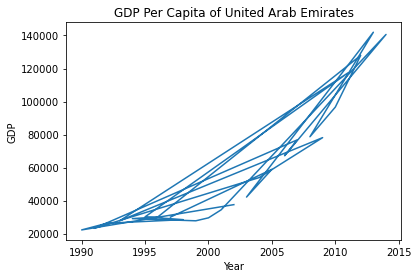

In [13]:
plt.plot(China['year'], China['gdp_percap'])
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Per Capita of United Arab Emirates')
plt.show()

<AxesSubplot:xlabel='year'>

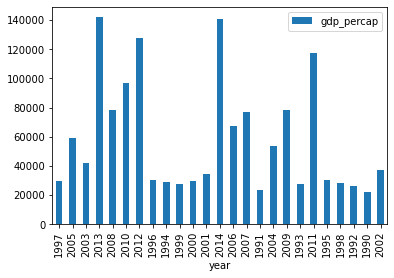

In [14]:
China.plot.bar(x='year', y='gdp_percap')

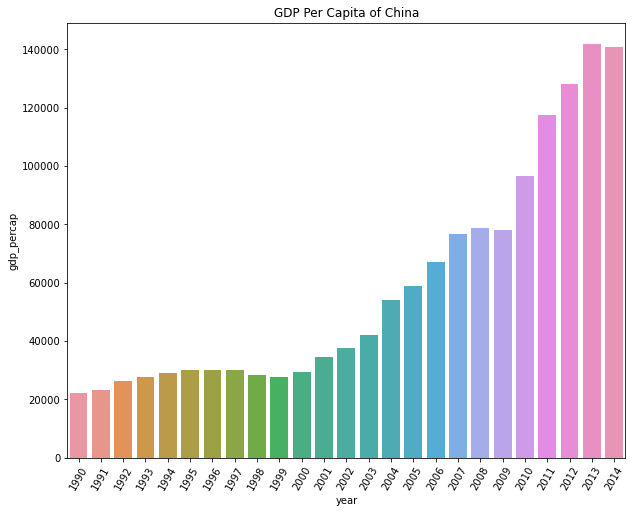

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x='year', y='gdp_percap', data=China)
plt.xticks(rotation=60)
plt.title('GDP Per Capita of China')
plt.show()

The country's GDP was highest in 2013. 

Since the GDP is per person, let's vies the  `gdp_percap`, `gdp` and `population` on the same grapgh.

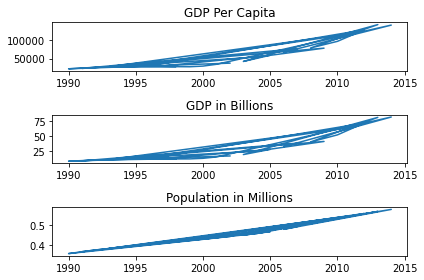

In [16]:
plt.subplot(311)
plt.title('GDP Per Capita')
plt.plot(China['year'], China['gdp_percap'] )

plt.subplot(312)
plt.title('GDP in Billions')
plt.plot(China['year'], China['population'] * China['gdp_percap']/10**9 )

plt.subplot(313)
plt.title('Population in Millions')
plt.plot(China['year'], China['population'] /10**6 )

plt.tight_layout()

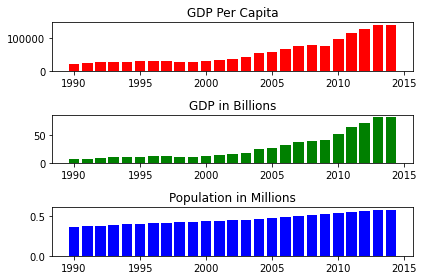

In [17]:
plt.subplot(311)
plt.title('GDP Per Capita')
plt.bar(China['year'], China['gdp_percap'], color = 'r' )

plt.subplot(312)
plt.title('GDP in Billions')
plt.bar(China['year'], China['population'] * China['gdp_percap']/10**9, color='g' )

plt.subplot(313)
plt.title('Population in Millions')
plt.bar(China['year'], China['population'] /10**6, color='b' )

plt.tight_layout()

UAE's GDP dropped a little in 2000. In 2015 it picked but population didn't rise

To tell how firster their  population grew relative to the gdp, compare the relative growth in a single plot by showing the population growth in the first year.

Set the first year's population to 100 as the basis of comparison, then repeat the same for gdp and gdp_percap

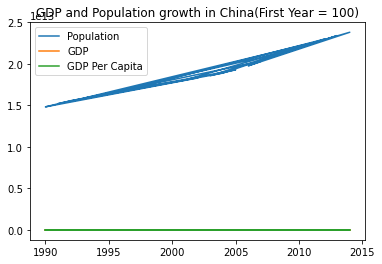

In [18]:
plt.plot(China['year'], China['population'] * China['population'].iloc[0]*100)
UAE_gdp = China['population'] * China['gdp_percap']
plt.plot(China['year'], UAE_gdp/ UAE_gdp.iloc[0]*100)
plt.plot(China['year'], China['gdp_percap'] /China['gdp_percap'].iloc[0]*100 )
plt.title('GDP and Population growth in China(First Year = 100)')
plt.legend(['Population', 'GDP', 'GDP Per Capita'])
plt.show()


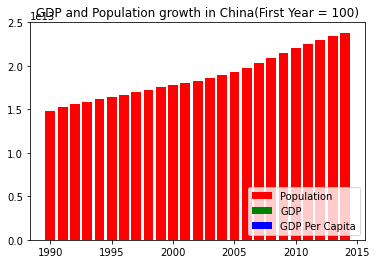

In [19]:
plt.bar(China['year'], China['population'] * China['population'].iloc[0]*100, color='r')
China_gdp = China['population'] * China['gdp_percap']
plt.bar(China['year'], China_gdp/ China_gdp.iloc[0]*100, color='g')
plt.bar(China['year'], China['gdp_percap'] /China['gdp_percap'].iloc[0]*100, color='b')
plt.title('GDP and Population growth in China(First Year = 100)')
plt.legend(['Population', 'GDP', 'GDP Per Capita'], loc=4)
plt.show()


At no point did China's gap ever catch up with the population growth

#### Compare top five countrys' gdps

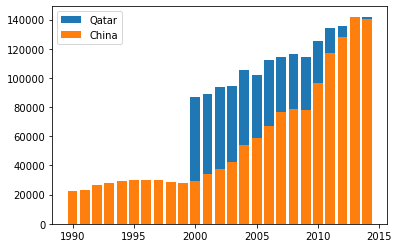

In [20]:
qt = dataset[dataset['country'] == 'Qatar']

plt.bar(qt['year'], qt['gdp_percap'])
plt.bar(China['year'], China['gdp_percap'])
plt.legend(['Qatar', 'China'])
plt.show()

In 2000. the gdp_percapita in Qatar was much higher than  in China but became equal in 2015.